# Fields Academy | Western University
### Neural Networks, Assignment 1
### Evan Callaghan
### Feb 15, 2023

In [ ]:
pip install torch, torchvision

In [4]:
## Importing all libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy import random
import numpy.matlib
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

### Problem 1. a)

\
Truth Table:

$x_1$|$x_2$|AND($x_1$, $x_2$)|OR($x_1$, $x_2$)|XOR($x_1$, $x_2$)|
--------|------| ------| ---|------|
0       | 0    |     0 | 0  | 0    |
0       | 1    |     0 | 1  | 1    |
1       | 0    |     0 | 1  | 1    |
1       | 1    |     1 | 1  | 0    |

\
XOR Equation: 

XOR($x_1$, $x_2$) = ($x_1$ OR $x_2$) AND NOT($x_1$ AND $x_2$)

\
Computational Graph: 

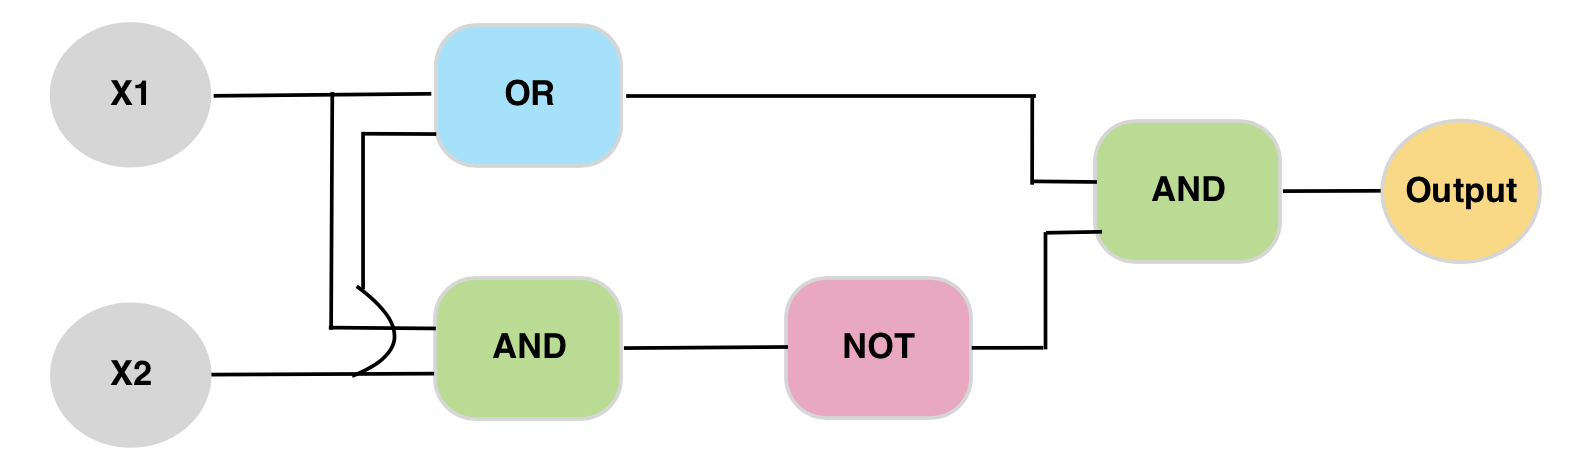

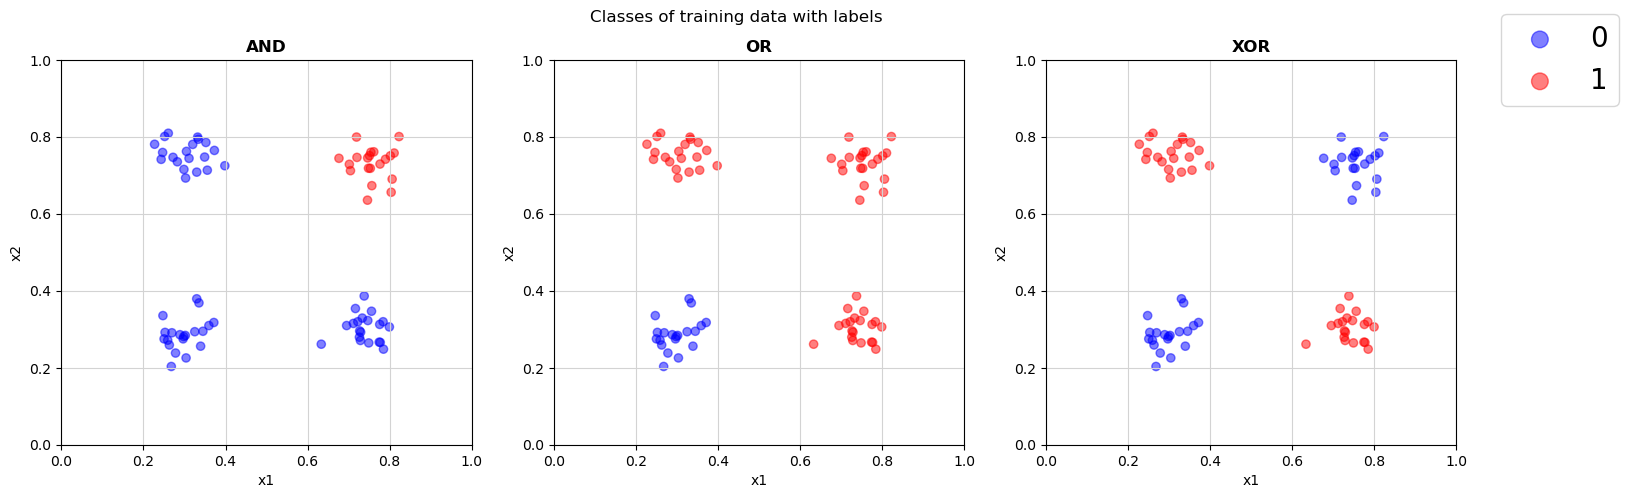

In [5]:
## Defining a function that generates the training data
def training_data(means, sigma, ndatapoints):
    nclasses = 4
    inputs = np.zeros((nclasses * ndatapoints, 2))
    labels = np.zeros((nclasses * ndatapoints, 3))
    colors = np.zeros((nclasses * ndatapoints, 3))
    means = means[np.argsort(np.sum(np.square(means), axis = 1))] ## sorting means such that AND OR XOR assignment is valid

    ## i. Generating a cluster of ndatapoints points for each (μ1, μ2)
    for c in range(0, nclasses):
        starti = c * ndatapoints
        endi = (c + 1) * ndatapoints
        inputs[starti:endi, :] = means[c] + sigma * random.standard_normal((ndatapoints, 2))
        colors[starti:endi, :] = np.matlib.repmat(np.random.rand(1, 3),ndatapoints, 1)
        
        ## ii. Assigning AND, OR, and XOR labels to each data point (x1, x2)
        if (c == 0):
            labels[starti:endi, :] = np.array([0, 0, 0])
        elif (c == 1):
            labels[starti:endi, :] = np.array([0, 1, 1])
        elif (c == 2):
            labels[starti:endi, :] = np.array([0, 1, 1])
        elif (c == 3):
            labels[starti:endi, :] = np.array([1, 1, 0])

    ## iii. Randomizing the order of the data points and their associated labels
    randvec = np.random.permutation(nclasses * ndatapoints)  
    inputs = inputs[randvec,:]
    labels = labels[randvec,:]
    colors = colors[randvec,:] 
    return inputs, labels, colors;

## Generating training data   
random.seed(3)
means = np.array([[0.3,0.3],[0.3,0.75],[0.75,0.3],[0.75,0.75]])
sigma = 0.04
ndatapoints = 20
[inputs, labels, colors] = training_data(means, sigma, ndatapoints)

## Producing a plot of the points for each of AND, OR, and XOR
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (18, 5))
fig.suptitle('Classes of training data with labels')
ax1.scatter(inputs[:,0], inputs[:,1], c = labels[:, 0], cmap = 'bwr', alpha = 0.5); ax1.set_title('AND', fontweight = 'semibold'); ax1.set_xlabel('x1'); ax1.set_ylabel('x2')
ax1.set_xlim(0, 1); ax1.set_ylim(0, 1); ax1.grid(color = 'lightgrey')
ax2.scatter(inputs[:,0], inputs[:,1], c = labels[:, 1], cmap = 'bwr', alpha = 0.5); ax2.set_title('OR', fontweight = 'semibold'); ax2.set_xlabel('x1'); ax2.set_ylabel('x2')
ax2.set_xlim(0, 1); ax2.set_ylim(0, 1); ax2.grid(color = 'lightgrey')
ax3.scatter(inputs[:,0], inputs[:,1], c = labels[:, 2], cmap = 'bwr', alpha = 0.5); ax3.set_title('XOR', fontweight = 'semibold'); ax3.set_xlabel('x1'); ax3.set_ylabel('x2')
ax3.set_xlim(0, 1); ax3.set_ylim(0, 1); ax3.grid(color = 'lightgrey')
fig.legend([0, 1], fontsize = '20', markerscale = 2)

Text(0, 0.5, 'x2')

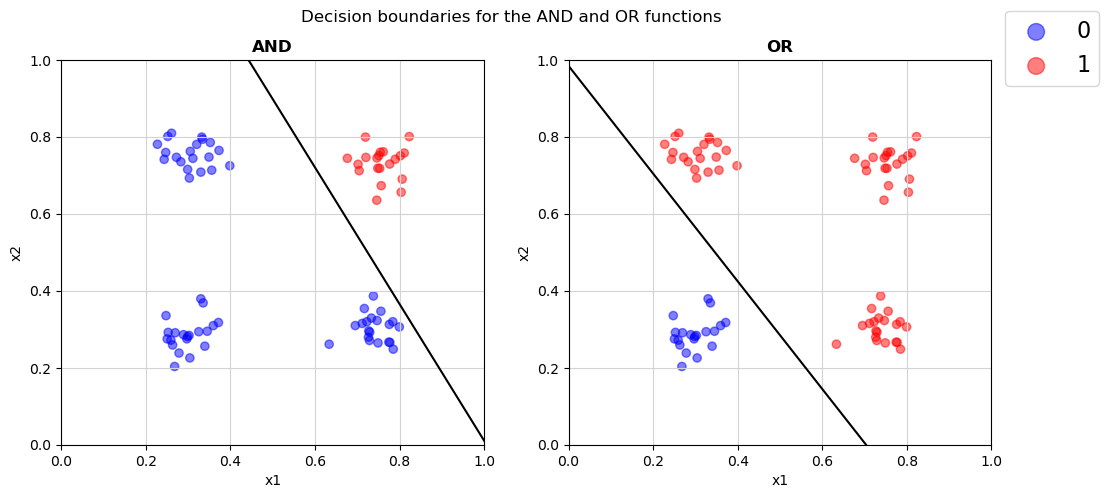

In [6]:
## Defining helper functions:
def sum_step(weights, inputs):
    summation = np.dot(inputs, weights[1:]) + weights[0]
    if summation > 0:
        prediction = 1
    else:
        prediction = 0            
    return prediction

def train(inputs, labels, learning_rate, nepoch):   
    weights = 0.001 * random.standard_normal(inputs.shape[1]+1)   
    errors = np.zeros((inputs.shape[0], nepoch))
    j = 0
    for _ in range(nepoch):
        i = 0
        for input, label in zip(inputs, labels):
            prediction = sum_step(weights, input)  
            weights[1:] += learning_rate * (label - prediction) * input
            weights[0] += learning_rate * (label - prediction)
            errors[i,j] = label - prediction
            i += 1   
        j += 1        
    return weights, errors;

def plot_boundary(weights):
    b = weights[0]; w1 = weights[1]; w2 = weights[2]
    slope = -(b / w2) / (b / w1)
    y_intercept = -b / w2
    x = np.linspace(0,1,100)
    y = (slope * x) + y_intercept
    return x, y

def weights_AND(inputs, labels, learning_rate, nepoch):
    [weights, errors] = train(inputs, labels, learning_rate, nepoch)    
    return weights

def weights_OR(inputs, labels, learning_rate, nepoch):
    [weights, errors] = train(inputs, labels, learning_rate, nepoch)    
    return weights

## Training the perceptron
learning_rate = 0.01
nepoch = 2
weights_and = weights_AND(inputs, labels[:, 0], learning_rate, nepoch)
weights_or = weights_OR(inputs, labels[:, 1], learning_rate, nepoch)

## Plotting the two decision boundaries for the AND and OR functions
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 5))
fig.suptitle('Decision boundaries for the AND and OR functions')
ax1.scatter(inputs[:,0], inputs[:,1], c = labels[:, 0], cmap = 'bwr', alpha = 0.5); ax1.set_title('AND', fontweight = 'semibold'); ax1.grid(color = 'lightgrey')
ax2.scatter(inputs[:,0], inputs[:,1], c = labels[:, 1], cmap = 'bwr', alpha = 0.5); ax2.set_title('OR', fontweight = 'semibold'); ax2.grid(color = 'lightgrey')
fig.legend([0, 1], fontsize = '16', markerscale = 2)

x, y = plot_boundary(weights_and); ax1.plot(x, y, color = 'black'); ax1.set_xlim(0, 1); ax1.set_ylim(0, 1); ax1.set_xlabel('x1'); ax1.set_ylabel('x2')
x, y = plot_boundary(weights_or); ax2.plot(x, y, color = 'black'); ax2.set_xlim(0, 1); ax2.set_ylim(0, 1); ax2.set_xlabel('x1'); ax2.set_ylabel('x2')

### Problem 1. d)
No, we cannot find the weights and biases of the XOR function using only a single perceptron. From lecture, we know that the XOR function is not linearly separable, i.e., it cannot be represented by a single line in the input space. However, we can use the computational graph created in part (a) to create a slightly more complex decision rule which can classify the XOR observations. 

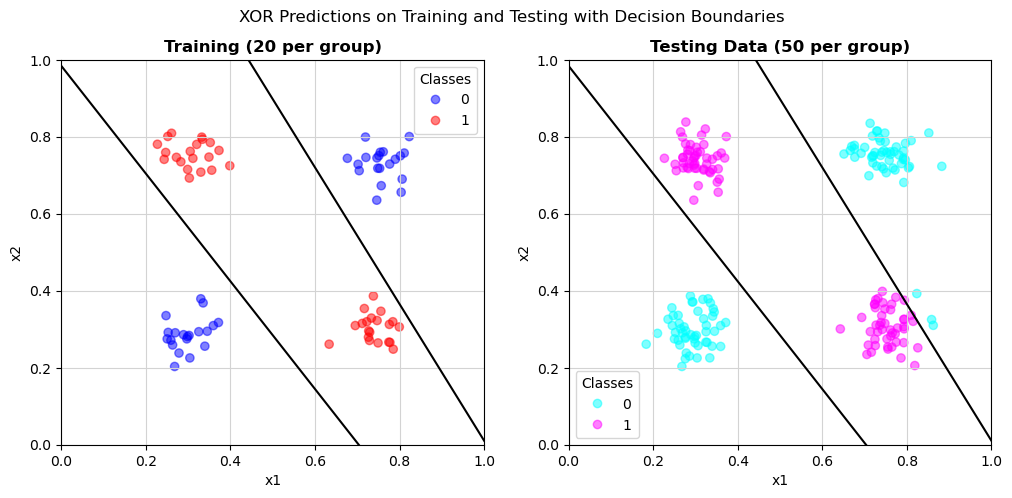


Training Data Accuracy: 1.0
Testing Data Accuracy: 0.985


In [7]:
## Defining the XOR wrapper function
def XOR(inputs, weights_OR, weights_AND):
    npredictions = inputs.shape[0]
    predictions = np.zeros(npredictions)
    for i in range(0, npredictions):
        predict_and = sum_step(weights_AND, inputs[i,:])
        predict_or = sum_step(weights_OR, inputs[i,:])
        predictions[i] = predict_or and not(predict_and)
    return predictions

## Generating testing data
random.seed(3)
ndatapoints_test = 50
[inputs_test, labels_test, colors_test] = training_data(means, sigma, ndatapoints_test)

## Predicting on the training and testing sets
xor_predictions_train = XOR(inputs, weights_or, weights_and)
xor_predictions_test = XOR(inputs_test, weights_or, weights_and)

## Plotting the decision boundaries for the AND and OR functions and labels for XOR predictions
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 5))
fig.suptitle('XOR Predictions on Training and Testing with Decision Boundaries')
scatter = ax1.scatter(inputs[:,0], inputs[:,1], c = xor_predictions_train, cmap = 'bwr', alpha = 0.5); ax1.set_title('Training (20 per group)', fontweight = 'semibold'); ax1.grid(color = 'lightgrey')
scatter2 = ax2.scatter(inputs_test[:,0], inputs_test[:,1], c = xor_predictions_test, cmap = 'cool', alpha = 0.5); ax2.set_title('Testing Data (50 per group)', fontweight = 'semibold'); ax2.grid(color = 'lightgrey')

x, y = plot_boundary(weights_and); ax1.plot(x, y, color = 'black'); ax1.set_xlim(0, 1); ax1.set_ylim(0, 1); ax1.set_xlabel('x1'); ax1.set_ylabel('x2')
x, y = plot_boundary(weights_or); ax1.plot(x, y, color = 'black');
x, y = plot_boundary(weights_and); ax2.plot(x, y, color = 'black'); ax2.set_xlim(0, 1); ax2.set_ylim(0, 1); ax2.set_xlabel('x1'); ax2.set_ylabel('x2')
x, y = plot_boundary(weights_or); ax2.plot(x, y, color = 'black');
ax1.legend(*scatter.legend_elements(), title = 'Classes'); plt.grid(color = 'lightgrey')
ax2.legend(*scatter2.legend_elements(), title = 'Classes');

plt.show()

## Finding the accuracy of the model on the training set as well as the test set
errors_train = labels[:,2].transpose() - xor_predictions_train; nerrors_train = np.sum(np.square(errors_train))
accuracy_train = 1 - (nerrors_train / errors_train.shape[0])
errors_test = labels_test[:,2].transpose() - xor_predictions_test; nerrors_test = np.sum(np.square(errors_test))
accuracy_test = 1 - (nerrors_test / errors_test.shape[0])
print('\nTraining Data Accuracy:', accuracy_train)
print('Testing Data Accuracy:', accuracy_test)

Note: The testing data is generated using the same means and variance as the training set, but we are drawing 50 samples for each cluster as opposed to 20 samples for each cluster in the training set.

### Problem 2. a)

Synaptic plasticity refers to the ability of synapses, the connections between neurons, to increase or decrease their strength over time in response to the varying levels in their actvity. This connection adjustment between neurons changes how they commuicate with each other and how they process incoming information. Synaptic plasticity is what gives us the ability to learn and create memories. Introduced by Donald Hebb in his book _The Organization of Behavior_, Hebbian Theory is an attempt to explain synaptic plasticity. The theory suggests that all synaptic connections start off as weak, but eventually form strong networks through repeated or persistent stimulation (creating the expression, "neurons that fire together, wire together"). 

From this theory came the development of Hebb networks. These networks are special types of artificial neural networks that learn through unsupervised learning, that is, there is no specified target variable or class in the learning process. Rather, the network makes connection adjustments based solely on properties of the input data. On the other hand, the perceptron is an artificial neuron that was developed for supervised learning tasks such as binary classification. As seen through the lectures, perceptrons have a fixed architecture and learn through the use of a feedback signal that tells them whether or not their calculated output value matches the expected value. While both of these learning rules are capable of making predictions, the Hebb network clearly has a more flexible architecture and does not require labeled data for training. As we have also discussed, the perceptron cannot classify data that is not linearly seperable. 


### Problem 2. b)
Truth Table:

$x_1$|$x_2$|AND($x_1$, $x_2$)|
--|---| --| 
-1| -1|-1 | 
-1| 1 |-1 | 
1 | -1|-1 | 
1 | 1 | 1 | 


### Problem 2. c)



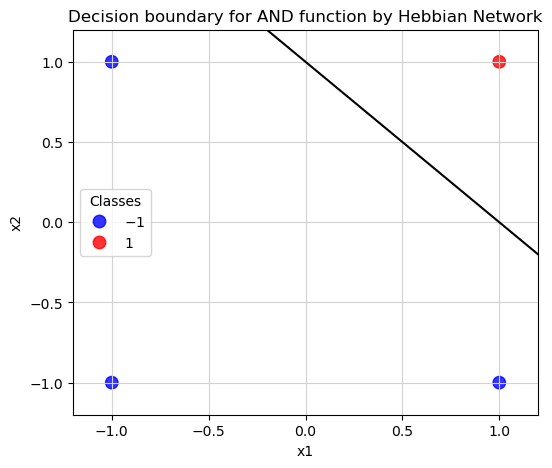

In [8]:
## Defining functions for the Hebbian learning algorithm
def train(inputs, labels, nepoch):   
    weights = np.zeros((3,))  
    j = 0
    for _ in range(nepoch):
        i = 0
        for input, label in zip(inputs, labels):
            weights[1:] += input * label
            weights[0] += label
            i += 1   
        j += 1        
    return weights;

def plot_boundary(weights):
    b = weights[0]; w1 = weights[1]; w2 = weights[2]
    slope = -(b / w2) / (b / w1)
    y_intercept = -b / w2
    x = np.linspace(-1.5, 1.5, 200)
    y = (slope * x) + y_intercept
    return x, y

## Generating the data
random.seed(3)
inputs = np.array([[1, 1], [1, -1], [-1, 1], [-1, -1]])
labels = np.array([1, -1, -1, -1])
nepoch = 1

## Training the network
weights = train(inputs, labels, nepoch)

# Plot the decision boundary
plt.figure(figsize=(6, 5))
scatter = plt.scatter(inputs[:, 0], inputs[:, 1], c = labels, cmap = 'bwr', alpha = 0.8, s = 80)
x, y = plot_boundary(weights); plt.plot(x, y, color = 'black'); plt.xlim(-1.2, 1.2); plt.ylim(-1.2, 1.2); plt.xlabel('x1'); plt.ylabel('x2')
plt.legend(*scatter.legend_elements(), title = 'Classes', markerscale = 1.5); plt.grid(color = 'lightgrey')
plt.title('Decision boundary for AND function by Hebbian Network')
plt.show()

After running a single epoch to learn the AND function over $Ω$ with a Hebbian network, we get a decision boundary that is able to seperate the two classes. The weights array has the following structure: [-2, 2, 2]. This results in the decision boundary with a slope of -1 and a y-intercept (bias term) of 1. When increasing the number of epochs, we achieve the exact same decision boundary.

### Problem 3

Approach:
1. Do this
2. Then do that

100%|██████████| 170498071/170498071 [00:02<00:00, 79925414.93it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


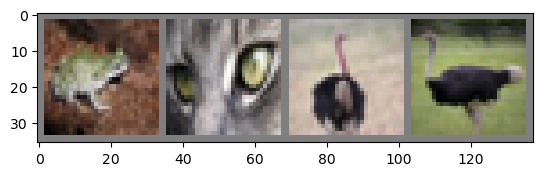

 frog   cat  bird  bird


In [9]:
## Downloading, splitting, and preprocessing the images
transform = transforms.Compose(
    [transforms.ToTensor(), 
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root = './data', train = True, download = True, transform = transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size = 4, shuffle = True, num_workers = 2)
testset = torchvision.datasets.CIFAR10(root = './data', train = False, download = True, transform = transform)
testloader = torch.utils.data.DataLoader(testset, batch_size = 4, shuffle = False, num_workers = 2)
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

## Defining function to show an image
def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.ion()
    plt.show()

## Showing some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)
imshow(torchvision.utils.make_grid(images))
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [10]:
## Defining the convolutional neural network
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()

In [11]:
## Defining the main function for training and evaluation
def training_evaluation(nepoch):

  ## Defining arrays to store results
  accuracy_train = np.zeros(nepoch); accuracy_test = np.zeros(nepoch)

  ## Considering training epochs from 1 to nepoch
  for i in range(0, nepoch):
    
    ## STEP 1: Train the CNN using i epochs
    epochs = i + 1
    criterion = nn.CrossEntropyLoss() ## Defining loss function
    optimizer = optim.SGD(net.parameters(), lr = 0.001, momentum = 0.9) ## Defining optimizer
    
    for epoch in range(epochs):
        running_loss = 0.0
        for j, data in enumerate(trainloader, 0):
            inputs, labels = data ## getting the data
            optimizer.zero_grad() ## initializing the parameter gradients to zero
            outputs = net(inputs) ## forward + backward + optimize steps
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

    ## STEP 2: Recording CNN accuracy on the training set (using top-1 accuracy)
    correct_train = 0; correct_test = 0
    total_train = 0; total_test = 0
    with torch.no_grad():
        for data in trainloader:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()
    accuracy_train[i] = (100 * correct_train / total_train)

    ## STEP 3: Recording CNN accuracy on the testing set (using top-1 accuracy)
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total_test += labels.size(0)
            correct_test += (predicted == labels).sum().item()
    accuracy_test[i] = (100 * correct_test / total_test)
    print('Epochs: %d Training Accuracy: %.2f Testing Accuracy: %.2f' % (epochs, accuracy_train[i], accuracy_test[i]))

  ## STEP 4: Returning the prediction accuracy arrays
  return accuracy_train, accuracy_test;

In [ ]:
## Calling the training_evaluation function
nepoch = 3
[accuracy_train, accuracy_test] = training_evaluation(nepoch)

## Plotting the prediction accuracy results
epochs = np.arange(1, nepoch+1, 1)
plt.figure(figsize=(18, 8))
plt.plot(epochs, accuracy_train, label = 'Training Set', color = 'crimson', linewidth = 4, marker = 'o', markersize = 12)
plt.plot(epochs, accuracy_test, label = 'Testing Set', color = 'steelblue', linewidth = 4, marker = 'o', markersize = 12)
plt.legend(fontsize = 14, markerscale = 0.8); plt.grid(color = 'lightgrey')
plt.title('CNN Prediction Accuracy', fontsize = 20)
plt.xlabel('Number of Epochs')
plt.ylabel('Prediction Accuracy (%)')
plt.show()